# **1. Load the Dataset in Google Colab Using Pandas**

In [213]:
# Importing the dataset
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
file_path = '/content/MLA - Dataset.csv'
df = pd.read_csv(file_path)

In [214]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8995 entries, 0 to 8994
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   SLNO                         8995 non-null   int64  
 1   Candidate Ref                8995 non-null   int64  
 2   DOJ Extended                 8995 non-null   object 
 3   Duration to accept offer     8991 non-null   float64
 4   Notice period                8992 non-null   float64
 5   Offered band                 8992 non-null   object 
 6   Pecent hike expected in CTC  8985 non-null   float64
 7   Percent hike offered in CTC  8985 non-null   float64
 8   Percent difference CTC       8988 non-null   float64
 9   Joining Bonus                8994 non-null   object 
 10  Candidate relocate actual    8994 non-null   object 
 11  Gender                       8990 non-null   object 
 12  Candidate Source             8987 non-null   object 
 13  Rex in Yrs        

# **2. Build a correlation matrix between all the numeric features in the dataset. Report the features, which are correlated at a cut-off of 0.70. What actions will you take on the features, which are highly correlated?**

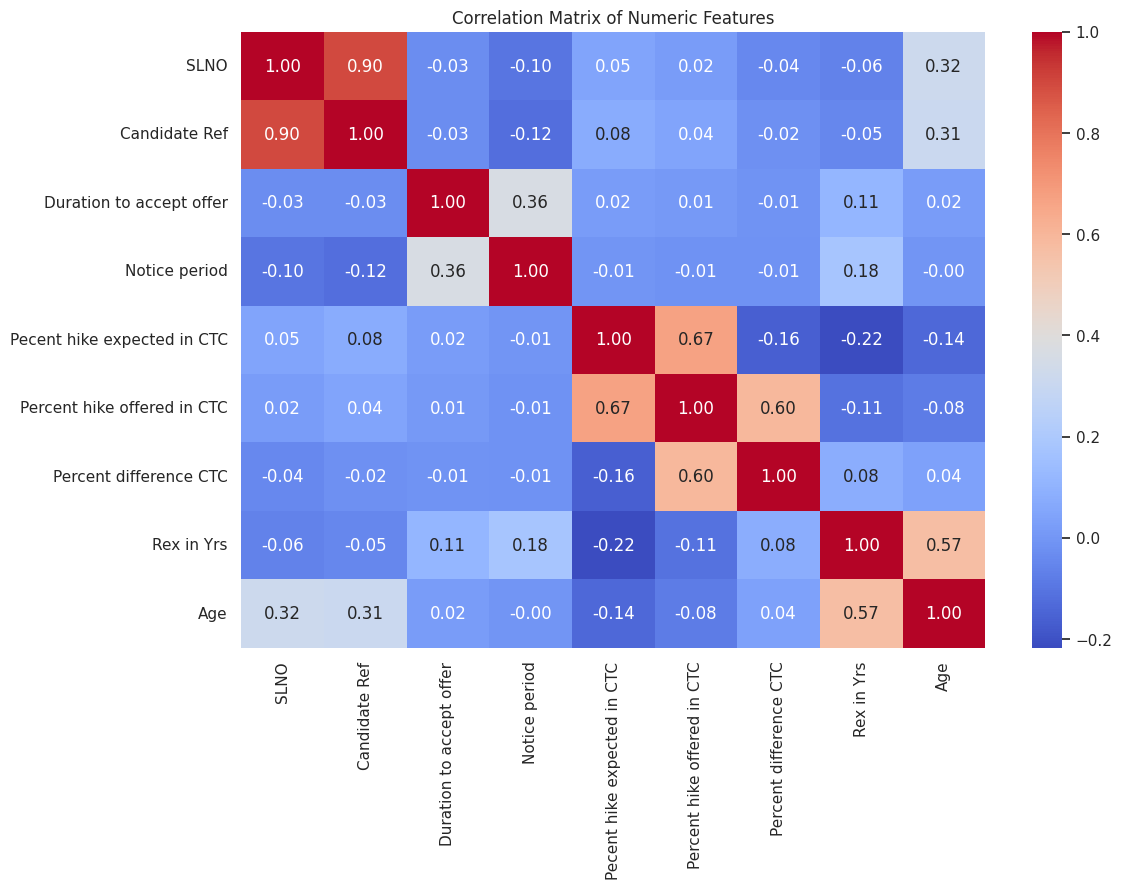

Highly correlated feature pairs (correlation > 0.70):
       Feature_1      Feature_2  Correlation
1           SLNO  Candidate Ref     0.898788
9  Candidate Ref           SLNO     0.898788


In [215]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric features
numeric_features = df.select_dtypes(include=[np.number])

# Calculate the correlation matrix
correlation_matrix = numeric_features.corr()

# Display the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Identify pairs of features with correlation above 0.70
high_corr_pairs = correlation_matrix.unstack().reset_index()
high_corr_pairs.columns = ['Feature_1', 'Feature_2', 'Correlation']
high_corr_pairs = high_corr_pairs[(high_corr_pairs['Correlation'] > 0.70) & (high_corr_pairs['Feature_1'] != high_corr_pairs['Feature_2'])]

print("Highly correlated feature pairs (correlation > 0.70):")
print(high_corr_pairs)


 Ans: Highly correlated (correlation > 0.70) are:

(1) SLNO   and  Candidate Ref  :   0.898788

(2) Candidate Ref  and SLNO    :    0.898788



**Actions to Take on Highly Correlated Features:**

Remove One of the Correlated Features: If two features are highly correlated, they provide similar information. Removing one of them can reduce redundancy and simplify the model.

Principal Component Analysis (PCA): If multiple features are correlated, you might consider using PCA to reduce the dimensionality while retaining most of the variance in the data.

Regularization Techniques: If you prefer to keep all features, using regularization methods like Lasso (L1 regularization) or Ridge (L2 regularization) can help in reducing the impact of correlated features by shrinking their coefficients.

# **3. Build a new feature named LOB_Hike_Offered using LOB and percentage hike offered. Include this as a part of the data frame created in step 1. What assumption are you trying to test with such variables?**

In [216]:
# Build a new feature LOB_Hike_Offered
df['LOB_Hike_Offered'] = df['LOB'] + '_' + df['Percent hike offered in CTC'].astype(str)

# Display the first few rows to verify the new feature
print(df[['LOB', 'Percent hike offered in CTC', 'LOB_Hike_Offered']].head())

     LOB  Percent hike offered in CTC LOB_Hike_Offered
0    ERS                        13.16        ERS_13.16
1  INFRA                       320.00      INFRA_320.0
2  INFRA                        42.84      INFRA_42.84
3  INFRA                        42.84      INFRA_42.84
4  INFRA                        42.59      INFRA_42.59


**By creating the LOB_Hike_Offered feature, we can test the following assumptions:**

Variation in Hike Across LOBs:

To examin whether the percentage hike offered is significantly different across various Lines of Business.

Impact of LOB on Compensation:

The assumption here could be that the LOB a candidate is joining may have a substantial impact on the percentage hike they are offered, perhaps due to the nature of work, demand for skills in that LOB, or company strategy.

Grouping and Segmentation:

This feature could also be used for segmentation analysis, where you group data based on the combination of LOB and hike offered, to find patterns in how offers are structured across different business lines.

# **4. Create a new data frame with the numeric features and categorical features as dummy variable coded features. Which features will you include for model building and why?**

In [217]:
import numpy as np

# Identify numeric and categorical features
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = df.select_dtypes(include=[object]).columns.tolist()

print("Numeric Features:", numeric_features)
print("Categorical Features:", categorical_features)


Numeric Features: ['SLNO', 'Candidate Ref', 'Duration to accept offer', 'Notice period', 'Pecent hike expected in CTC', 'Percent hike offered in CTC', 'Percent difference CTC', 'Rex in Yrs', 'Age']
Categorical Features: ['DOJ Extended', 'Offered band', 'Joining Bonus', 'Candidate relocate actual', 'Gender', 'Candidate Source', 'LOB', 'Location', 'Status', 'LOB_Hike_Offered']


In [218]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import pandas as pd

# Initialize encoders
label_encoder = LabelEncoder()
one_hot_encoder = OneHotEncoder(sparse=False, drop='first')  # drop='first' avoids multicollinearity

# List of categorical features to be label encoded (ordinal or simple categories)
label_encode_features = ['Gender', 'Candidate relocate actual', 'Joining Bonus', 'DOJ Extended', 'Status']

# List of categorical features to be one-hot encoded (nominal categories)
one_hot_encode_features = ['LOB', 'Candidate Source', 'Location', 'Offered band']

# Apply Label Encoding to the selected features
for feature in label_encode_features:
    df[feature] = label_encoder.fit_transform(df[feature])

# Apply One-Hot Encoding to the selected features
df_one_hot = pd.DataFrame(one_hot_encoder.fit_transform(df[one_hot_encode_features]),
                          columns=one_hot_encoder.get_feature_names_out(one_hot_encode_features))

# Drop the original columns that were one-hot encoded
df = df.drop(columns=one_hot_encode_features)

# Concatenate the one-hot encoded columns back to the original DataFrame
df_model = pd.concat([df, df_one_hot], axis=1)

# Display the first few rows of the updated DataFrame
df_model.head()


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,SLNO,Candidate Ref,DOJ Extended,Duration to accept offer,Notice period,Pecent hike expected in CTC,Percent hike offered in CTC,Percent difference CTC,Joining Bonus,Candidate relocate actual,...,Location_Kolkata,Location_Mumbai,Location_Noida,Location_Others,Location_Pune,Location_nan,Offered band_E1,Offered band_E2,Offered band_E3,Offered band_nan
0,1,2110407,1,14.0,30.0,-20.79,13.16,42.86,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,2112635,0,18.0,30.0,50.00,320.00,180.00,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,2112838,0,3.0,45.0,42.84,42.84,0.00,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4,2115021,0,26.0,30.0,42.84,42.84,0.00,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5,2115125,1,1.0,120.0,42.59,42.59,0.00,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


**Features to Include for Model Building**

Features to Include for Model Building:

**Numeric Features:**

*   Duration to accept the offer: This may affect the likelihood of the candidate joining.
*   Notice period: This can influence the timing and decision-making process.


*  Percentage hike expected/offered: These are directly related to the candidate's financial expectations and the company's offer.

*   Percent difference CTC: This captures the gap between what was expected and what was offered.
*   REX (in years): Relevant experience can be a crucial factor in the candidate's decision.


*   Age: Age may influence the acceptance of the offer (to be transformed into age).



**Categorical Features Converted into Numerical (after Lable encoding using dummy variable):**


*  DOJ extended (Yes/No): This binary feature can influence the joining decision.

*  Joining bonus (Yes/No): This can act as an incentive for the candidate to join.
*  Gender (Male/Female): Gender may have indirect effects on decisions.

*   Candidate relocate actual (Yes/No): Relocation can be a significant factor in the decision to accept the offer.

*   Status (Yes/No): Status can be the significant factor in accepting the offer or not.



**Categorical Features (after One-Hot encoding using dummy variable):**

*   Offered band (E0/E1/E2/E3): This captures the position level, which is crucial for the candidate's decision.

*   Candidate source (Employee referral/Agency/Direct): This shows the effectiveness of different recruitment channels.

*  LOB (Line of Business): This indicates the department for which the offer was made.

*   Location: The location might affect the candidate's willingness to join.




**Reasons for Including These Features:**

*  Predictive Power: These features are likely to have a strong influence on the target variable, such as the candidate's decision to join the company.
*   Coverage of Relevant Aspects: The selected features cover various aspects, including financial expectations, job position, location, and personal factors, all of which can influence the outcome.
*   Avoiding Multicollinearity: By transforming categorical variables into dummy variables, we reduce the risk of multicollinearity, ensuring that the model does not become unstable.

# **5. Split the data into training set and test set. Use 80% of data for model training and 20% for model testing.**

In [219]:
from sklearn.model_selection import train_test_split

# Assuming 'HR status' is the target variable
X = df_model.drop(columns=['Status'])  # Drop the target variable from the feature set
y = df_model['Status']  # Define the target variable


In [220]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (7196, 41)
X_test shape: (1799, 41)
y_train shape: (7196,)
y_test shape: (1799,)


# **6. Build a model using Gender and Age as independent variable and Status as dependent variable.**

# **• Are Gender and Age a significant feature in this model?**

# **• What inferences can be drawn from this model?**

In [221]:
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [222]:
# Select independent variables and the dependent variable
X = df_model[['Gender', 'Age']]  # Gender is already label encoded, and Age is numeric
y = df_model['Status']

# Add a constant to the model (for the intercept)
X_with_const = sm.add_constant(X)

In [223]:
# Select independent variables and the dependent variable
X = df_model[['Gender', 'Age']]  # Gender is already label encoded, and Age is numeric
y = df_model['Status']  # Assuming 'HR status' is already binary encoded

# Check for and handle missing values (NaNs) in X
X = X.fillna(X.mean()) # Replace missing values with the mean of each column

# Check for and handle infinite values (inf) in X
X = X.replace([np.inf, -np.inf], np.nan).fillna(X.mean()) # Replace infinite values with NaNs and then with the mean

# Add a constant to the model (for the intercept)
X_with_const = sm.add_constant(X)

# Fit the model using statsmodels
logit_model = sm.Logit(y, X_with_const)
result = logit_model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.480564
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                 Status   No. Observations:                 8995
Model:                          Logit   Df Residuals:                     8992
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                0.002633
Time:                        18:06:08   Log-Likelihood:                -4322.7
converged:                       True   LL-Null:                       -4334.1
Covariance Type:            nonrobust   LLR p-value:                 1.105e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.6574      0.205     -3.210      0.001      -1.059      -0.256
Gender         0.1315      0.

In [224]:
# Split the data (if not already split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and fit the Logistic Regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.81100611450806
Confusion Matrix:
 [[1459    0]
 [ 340    0]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      1.00      0.90      1459
           1       0.00      0.00      0.00       340

    accuracy                           0.81      1799
   macro avg       0.41      0.50      0.45      1799
weighted avg       0.66      0.81      0.73      1799



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


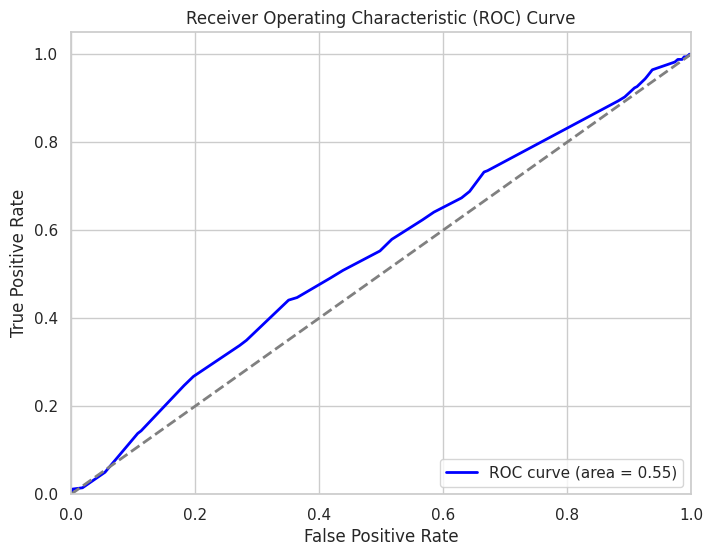

ROC-AUC Score: 0.55


In [225]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Predict the probability scores for the positive class (Status = 1)
y_prob = logreg.predict_proba(X_test) [:, 1]

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate the ROC-AUC score
roc_auc = roc_auc_score(y_test, y_prob)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

# Print the ROC-AUC score
print(f'ROC-AUC Score: {roc_auc:.2f}')


# **7. Build a model with statsmodel.api to predict the probability of Not Joining. How do you interpret the model outcome? Report the model performance on the test set.**

Optimization terminated successfully.
         Current function value: 0.480624
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Not_Joining   No. Observations:                 8993
Model:                          Logit   Df Residuals:                     8990
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                0.002635
Time:                        18:06:19   Log-Likelihood:                -4322.3
converged:                       True   LL-Null:                       -4333.7
Covariance Type:            nonrobust   LLR p-value:                 1.097e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6574      0.205     -3.210      0.001      -1.059      -0.256
Gender         0.1318      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


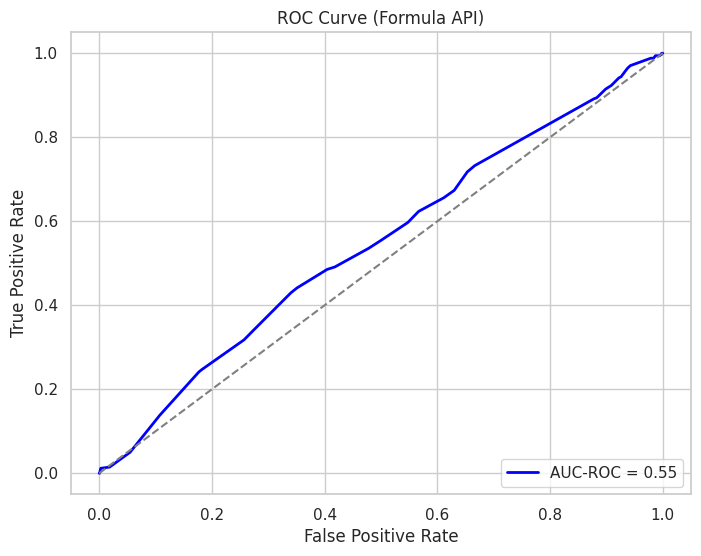

In [226]:
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a new DataFrame for formula-based modeling
data_model_formula = df_model.copy()

# Convert 'Status' to a binary variable for logistic regression (0 = Joined, 1 = Not Joined)
data_model_formula['Not_Joining'] = (data_model_formula['Status'] == 1).astype(int)

# Define the formula for logistic regression
formula = 'Not_Joining ~ Gender + Age'

# Build the logistic regression model using statsmodels.formula.api
model_formula = smf.logit(formula, data=data_model_formula).fit()

# Print the model summary
print(model_formula.summary())

# Predict on the test set
X_test_formula = data_model_formula[['Gender', 'Age']].iloc[y_test.index]
X_test_formula = sm.add_constant(X_test_formula)  # Add a constant term
y_pred_prob_formula = model_formula.predict(X_test_formula)
y_pred_formula = (y_pred_prob_formula > 0.5).astype(int)

# Evaluate the model performance
accuracy_formula = accuracy_score(y_test, y_pred_formula)
print(f'Accuracy: {accuracy_formula}')

# Confusion Matrix
cm_formula = confusion_matrix(y_test, y_pred_formula)
print("Confusion Matrix:")
print(cm_formula)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_formula))

# AUC-ROC
roc_auc_formula = roc_auc_score(y_test, y_pred_prob_formula)
print(f'AUC-ROC: {roc_auc_formula}')

# Plot ROC curve
fpr_formula, tpr_formula, _ = roc_curve(y_test, y_pred_prob_formula)
plt.figure(figsize=(8,6))
plt.plot(fpr_formula, tpr_formula,color='blue', lw=2, label=f'AUC-ROC = {roc_auc_formula:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Formula API)')
plt.legend(loc='lower right')
plt.show()

# **8. Build a model with statsmodel.formula.api to predict the probability of Not Joining and report the model performance on the test set. What difference do you observe in the model built here and the one built in step 7.**

Optimization terminated successfully.
         Current function value: 0.480624
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:            Not_Joining   No. Observations:                 8993
Model:                          Logit   Df Residuals:                     8990
Method:                           MLE   Df Model:                            2
Date:                Tue, 03 Sep 2024   Pseudo R-squ.:                0.002635
Time:                        18:06:26   Log-Likelihood:                -4322.3
converged:                       True   LL-Null:                       -4333.7
Covariance Type:            nonrobust   LLR p-value:                 1.097e-05
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.6574      0.205     -3.210      0.001      -1.059      -0.256
Gender         0.1318      0.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


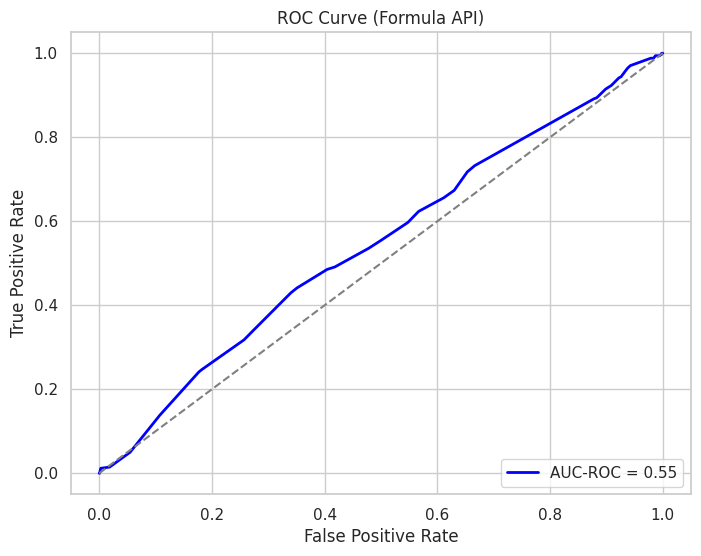

In [227]:
import statsmodels.formula.api as smf
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Create a new DataFrame for formula-based modeling
data_model_formula = df_model.copy()

# Convert 'Status' to a binary variable for logistic regression (0 = Joined, 1 = Not Joined)
data_model_formula['Not_Joining'] = (data_model_formula['Status'] == 1).astype(int)

# Define the formula for logistic regression
formula = 'Not_Joining ~ Gender + Age'

# Build the logistic regression model using statsmodels.formula.api
model_formula = smf.logit(formula, data=data_model_formula).fit()

# Print the model summary
print(model_formula.summary())

# Predict on the test set
X_test_formula = data_model_formula[['Gender', 'Age']].iloc[y_test.index]
X_test_formula = sm.add_constant(X_test_formula)  # Add a constant term
y_pred_prob_formula = model_formula.predict(X_test_formula)
y_pred_formula = (y_pred_prob_formula > 0.5).astype(int)

# Evaluate the model performance
accuracy_formula = accuracy_score(y_test, y_pred_formula)
print(f'Accuracy: {accuracy_formula}')

# Confusion Matrix
cm_formula = confusion_matrix(y_test, y_pred_formula)
print("Confusion Matrix:")
print(cm_formula)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_formula))

# AUC-ROC
roc_auc_formula = roc_auc_score(y_test, y_pred_prob_formula)
print(f'AUC-ROC: {roc_auc_formula}')

# Plot ROC curve
fpr_formula, tpr_formula, _ = roc_curve(y_test, y_pred_prob_formula)
plt.figure(figsize=(8,6))
plt.plot(fpr_formula, tpr_formula,color='blue', lw=2, label=f'AUC-ROC = {roc_auc_formula:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Formula API)')
plt.legend(loc='lower right')
plt.show()

# **9. Build a model using sklearn package to predict the probability of Not Joining. What difference do you observe in this model compared to model built in step 7 and 8.**

Accuracy: 0.81100611450806
Confusion Matrix:
[[1459    0]
 [ 340    0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      1.00      0.90      1459
           1       0.00      0.00      0.00       340

    accuracy                           0.81      1799
   macro avg       0.41      0.50      0.45      1799
weighted avg       0.66      0.81      0.73      1799

AUC-ROC: 0.545803935007862


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


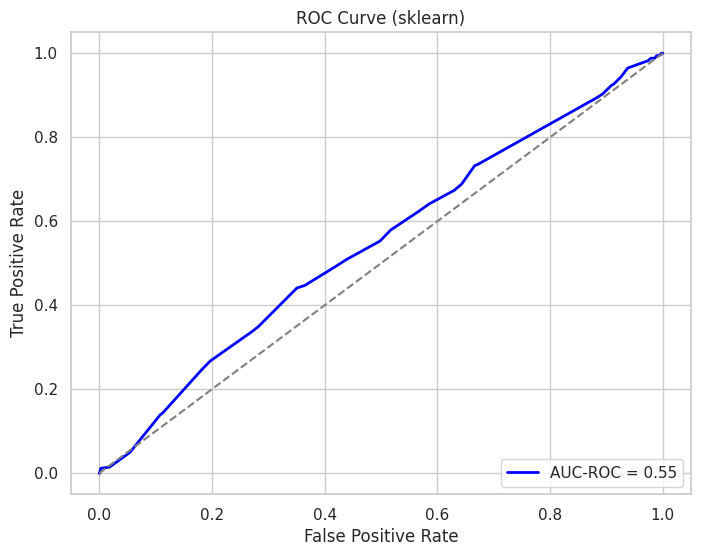

In [230]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer # Import the imputer

# Prepare the data for sklearn model
X = df_model[['Gender', 'Age']]
y = (df_model['Status'] == 1).astype(int)  # Binary target variable: 1 = Not Joining, 0 = Joining

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle missing values using SimpleImputer
imputer = SimpleImputer(strategy='mean') # Replace missing values with the mean
X_train = imputer.fit_transform(X_train)
X_test = imputer.transform(X_test) # Use the same imputer fitted on training data for the test data

# Create a logistic regression model using sklearn
model_sklearn = LogisticRegression()

# Train the model
model_sklearn.fit(X_train, y_train)

# Predict the probability of not joining on the test set
y_pred_prob_sklearn = model_sklearn.predict_proba(X_test)[:, 1]  # Probability of the class "Not Joining"
y_pred_sklearn = (y_pred_prob_sklearn > 0.5).astype(int)  # Convert probabilities to binary predictions

# Evaluate the model performance
accuracy_sklearn = accuracy_score(y_test, y_pred_sklearn)
print(f'Accuracy: {accuracy_sklearn}')

# Confusion Matrix
cm_sklearn = confusion_matrix(y_test, y_pred_sklearn)
print("Confusion Matrix:")
print(cm_sklearn)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred_sklearn))

# AUC-ROC
roc_auc_sklearn = roc_auc_score(y_test, y_pred_prob_sklearn)
print(f'AUC-ROC: {roc_auc_sklearn}')

# Plot ROC curve
fpr_sklearn, tpr_sklearn, _ = roc_curve(y_test, y_pred_prob_sklearn)
plt.figure(figsize=(8, 6))
plt.plot(fpr_sklearn, tpr_sklearn,color='blue', lw=2, label=f'AUC-ROC = {roc_auc_sklearn:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (sklearn)')
plt.legend(loc='lower right')
plt.show()

# **10. Fine-tune the cut-off value using cost of misclassification as a strategy. The cut-off should help classify maximum number of Not Joining cases correctly.**

Best Cut-Off Value: 0.15999999999999998
Minimum Misclassification Cost: 1446
Accuracy: 0.23846581434130074
Confusion Matrix:
 [[ 108 1351]
 [  19  321]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.07      0.14      1459
           1       0.19      0.94      0.32       340

    accuracy                           0.24      1799
   macro avg       0.52      0.51      0.23      1799
weighted avg       0.73      0.24      0.17      1799



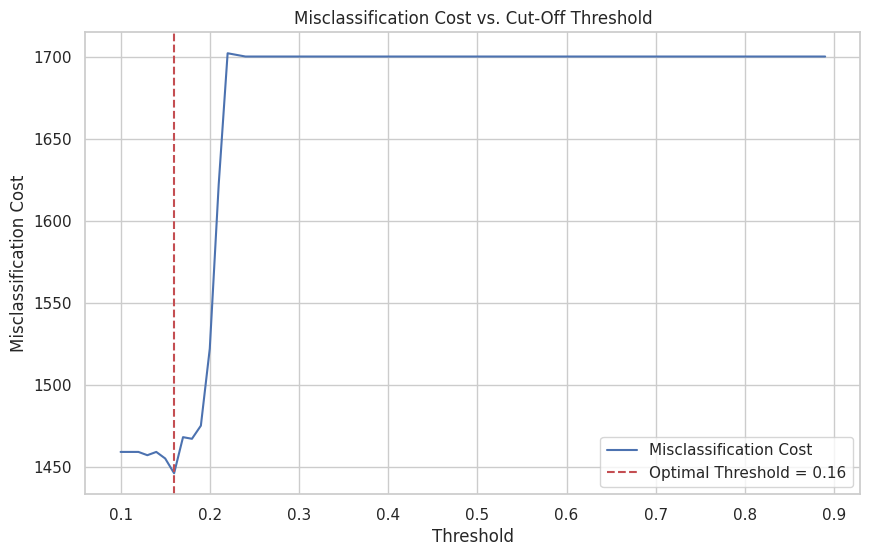

In [240]:
from sklearn.linear_model import LogisticRegression

# Initialize and fit the Logistic Regression model
logreg_sklearn = LogisticRegression()
logreg_sklearn.fit(X_train, y_train)


# Predict probabilities on the test set
y_test_prob = logreg_sklearn.predict_proba(X_test)[:, 1]


import numpy as np

# Define costs
cost_fp = 1  # Cost of a False Positive
cost_fn = 5  # Cost of a False Negative (higher cost)

# Initialize lists to store thresholds and costs
thresholds = []
costs = []

# Iterate over possible cut-off values
cutoff_values = np.arange(0.1, 0.9, 0.01)

for cutoff in cutoff_values:
    # Apply the cut-off to classify
    y_pred_cutoff = (y_test_prob >= cutoff).astype(int)

    # Calculate confusion matrix components
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred_cutoff).ravel()

    # Calculate total misclassification cost
    total_cost = cost_fp * fp + cost_fn * fn

    # Store the threshold and its corresponding cost
    thresholds.append(cutoff)
    costs.append(total_cost)

# Find the optimal threshold
optimal_index = np.argmin(costs)
optimal_threshold = thresholds[optimal_index]
min_cost = costs[optimal_index]

print(f"Best Cut-Off Value: {optimal_threshold}")
print(f"Minimum Misclassification Cost: {min_cost}")

# Evaluate the model with the best cut-off
y_pred_best_cutoff = (y_test_prob >= optimal_threshold).astype(int)
accuracy = accuracy_score(y_test, y_pred_best_cutoff)
conf_matrix = confusion_matrix(y_test, y_pred_best_cutoff)
class_report = classification_report(y_test, y_pred_best_cutoff)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

# Plot the cost as a function of the threshold
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(thresholds, costs, label='Misclassification Cost')
plt.axvline(optimal_threshold, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold:.2f}')
plt.xlabel('Threshold')
plt.ylabel('Misclassification Cost')
plt.title('Misclassification Cost vs. Cut-Off Threshold')
plt.legend()
plt.show()

# **11. Fine-tune the cut-off value using youdens index as a strategy. The cut-off should help balance the classification of Joined and Not Joined cases.**

Optimal Threshold (Youden's Index): 0.18999999999999995
Accuracy at Optimal Threshold (Youden's Index): 0.5647581989994441
Confusion Matrix at Optimal Threshold (Youden's Index):
[[849 610]
 [173 167]]
Classification Report at Optimal Threshold (Youden's Index):
              precision    recall  f1-score   support

           0       0.83      0.58      0.68      1459
           1       0.21      0.49      0.30       340

    accuracy                           0.56      1799
   macro avg       0.52      0.54      0.49      1799
weighted avg       0.71      0.56      0.61      1799



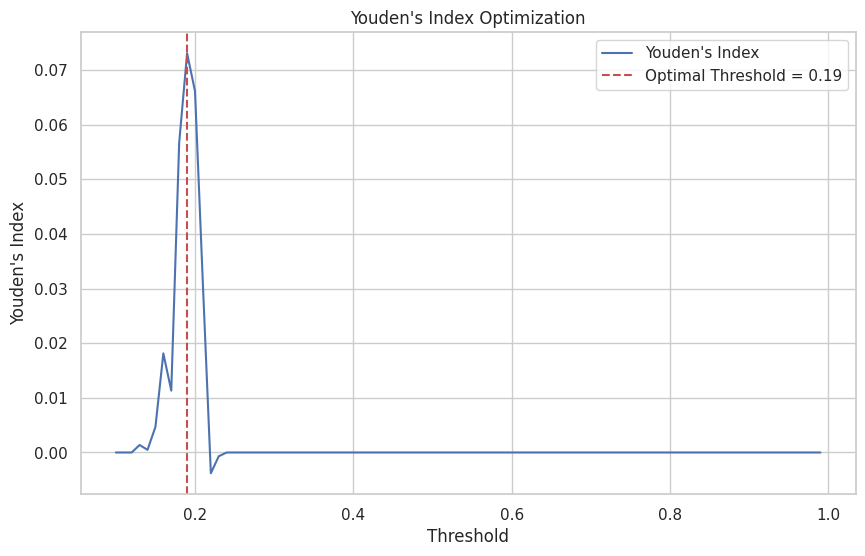

In [241]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Define a range of thresholds to evaluate
thresholds = np.arange(0.1, 1.0, 0.01)

# Function to calculate Youden's Index
def youdens_index(y_true, y_pred_prob, threshold):
    y_pred = (y_pred_prob >= threshold).astype(int)
    cm = confusion_matrix(y_true, y_pred)
    tn, fp, fn, tp = cm.ravel()
    sensitivity = tp / (tp + fn)
    specificity = tn / (tn + fp)
    return sensitivity + specificity - 1

# Calculate Youden's Index for each threshold
youdens_indices = [youdens_index(y_test, y_pred_prob_sklearn, t) for t in thresholds]

# Find the threshold with the maximum Youden's Index
optimal_threshold_youden = thresholds[np.argmax(youdens_indices)]
print(f'Optimal Threshold (Youden\'s Index): {optimal_threshold_youden}')

# Predict using the optimal threshold
y_pred_optimal_youden = (y_pred_prob_sklearn >= optimal_threshold_youden).astype(int)

# Evaluate the model with the optimal threshold
accuracy_optimal_youden = accuracy_score(y_test, y_pred_optimal_youden)
print(f'Accuracy at Optimal Threshold (Youden\'s Index): {accuracy_optimal_youden}')

# Confusion Matrix
cm_optimal_youden = confusion_matrix(y_test, y_pred_optimal_youden)
print("Confusion Matrix at Optimal Threshold (Youden's Index):")
print(cm_optimal_youden)

# Classification Report
print("Classification Report at Optimal Threshold (Youden's Index):")
print(classification_report(y_test, y_pred_optimal_youden))

# Plot the Youden's Index as a function of the threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, youdens_indices, label="Youden's Index")
plt.axvline(optimal_threshold_youden, color='r', linestyle='--', label=f'Optimal Threshold = {optimal_threshold_youden:.2f}')
plt.xlabel('Threshold')
plt.ylabel("Youden's Index")
plt.title("Youden's Index Optimization")
plt.legend()
plt.show()

# **12. Apply the cut-off values obtained in step 10 and step 11 on the test set. What inference can be deduced from it?**

**Cut-Off Value: 0.16 in Step 10**

Performance:

The accuracy is relatively low (24%).
The model performs well in identifying positive cases (class 1) with high recall (94%), but at the cost of very low precision (19%) and poor overall accuracy.
The precision for class 0 is high (85%), but the recall is very low (7%). This means the model is highly conservative in predicting class 0, missing many actual positive cases (class 1).
Implications:

This cut-off value is skewed towards predicting class 1, resulting in a high number of false positives for class 0. This approach could be useful if the cost of missing class 1 is high, but it leads to many misclassified negatives.
It may be suitable for scenarios where detecting positives is crucial, even at the cost of a large number of false positives.

**Cut-Off Value (Youden’s Index) in Step 11: 0.19**

Performance:

The accuracy is higher (56%) compared to the previous threshold.
The precision and recall for both classes are more balanced compared to the first threshold.
The F1-scores are also better, with a significant improvement for class 0 (0.68) and a moderate improvement for class 1 (0.30).
Implications:

This cut-off value provides a more balanced approach, improving overall accuracy and providing a reasonable trade-off between precision and recall.
It could be preferable for balanced applications where both false positives and false negatives have significant consequences.

**Conclusion**

Cut-Off Value of 0.16: Good for high recall of positives but comes with a cost of very low precision and overall accuracy. Suitable when missing positives is more critical.
Cut-Off Value of 0.19: Offers a more balanced performance, improving overall accuracy and providing a better trade-off between precision and recall for both classes.